### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-09/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-2D
##### Caracteristicas = alfa de C3 y C4
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 39.76%
##### Kappa = 0.19

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 2, 255, 1))
x_test = x_test.reshape((n_samples_test, 2, 255, 1))

print(x_train.shape)
print(x_test.shape)

(288, 2, 255, 1)
(288, 2, 255, 1)


In [0]:
def CNN_2D():
  model = Sequential()
  model = Sequential()
  model.add(Conv2D(4, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
  model.add(MaxPool2D((2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))
    
  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

Iteration: 1
288/288 - 0s - loss: 2.7208 - acc: 0.3264
kappa:  0.10185185185185186
f1: 0.3278176193691393
confusion matrix:
 [[23 25 19  5]
 [27 25 12  8]
 [18  9 20 25]
 [ 8 12 26 26]]


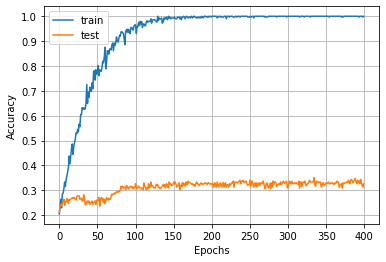

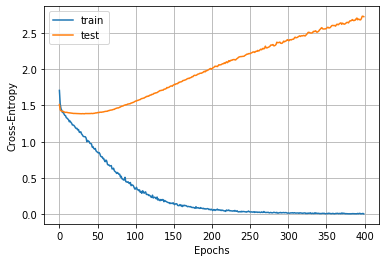

Iteration: 2
288/288 - 0s - loss: 2.9452 - acc: 0.2951
kappa:  0.06018518518518523
f1: 0.29508464459609346
confusion matrix:
 [[21 17 20 14]
 [27 19 12 14]
 [21 10 21 20]
 [ 8 18 22 24]]


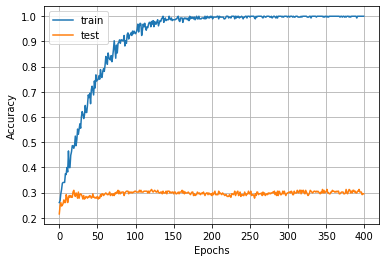

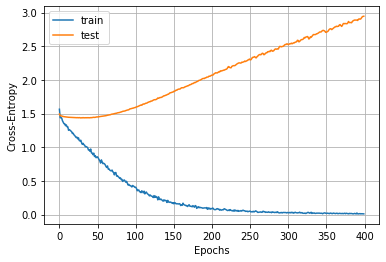

Iteration: 3
288/288 - 0s - loss: 3.2176 - acc: 0.2917
kappa:  0.05555555555555558
f1: 0.29130034400918015
confusion matrix:
 [[23 15 18 16]
 [23 19 17 13]
 [23 13 18 18]
 [12 19 17 24]]


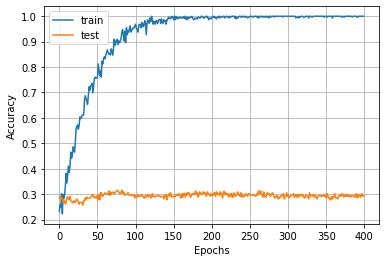

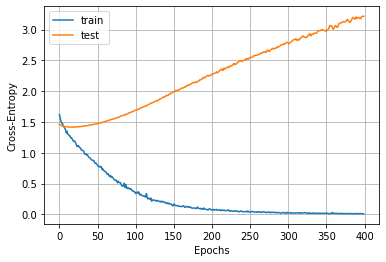

Iteration: 4
288/288 - 0s - loss: 2.7326 - acc: 0.3368
kappa:  0.1157407407407407
f1: 0.33131812211463607
confusion matrix:
 [[25 17 15 15]
 [28 16 14 14]
 [17 13 20 22]
 [ 8 15 13 36]]


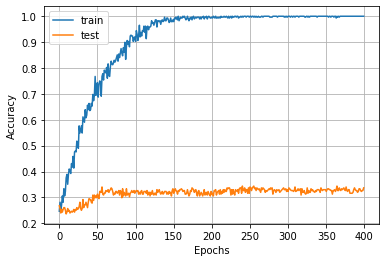

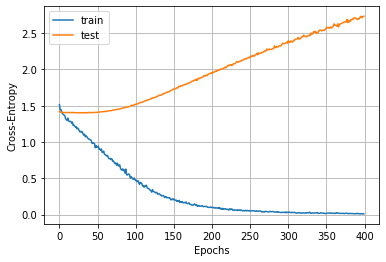

Iteration: 5
288/288 - 0s - loss: 2.8149 - acc: 0.3646
kappa:  0.1527777777777778
f1: 0.3647312446105203
confusion matrix:
 [[24 23 16  9]
 [18 29 15 10]
 [19  8 23 22]
 [14 13 16 29]]


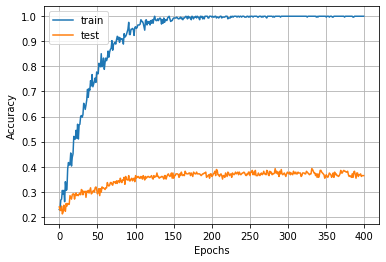

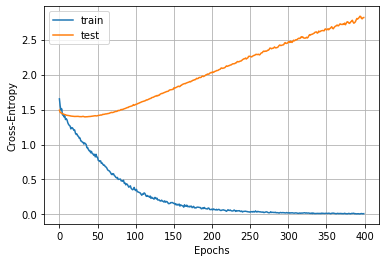


Resultados:
loss: [2.7208491563796997, 2.945185210969713, 3.217647817399767, 2.7325547536214194, 2.8149176438649497]
accuracy: [0.3263889, 0.2951389, 0.29166666, 0.33680555, 0.36458334]
kappa: [0.10185185185185186, 0.06018518518518523, 0.05555555555555558, 0.1157407407407407, 0.1527777777777778]
f1: [0.3278176193691393, 0.29508464459609346, 0.29130034400918015, 0.33131812211463607, 0.3647312446105203]


In [13]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_2D()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [14]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 2, 255, 4)         40        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 127, 4)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 508)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32576     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 260       
Total params: 32,876
Trainable params: 32,876
Non-trainable params: 0
_________________________________________________

In [15]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.3229
Mean Kappa: 0.0972
Mean F1: 0.3221
Max Accuracy: 0.3646
Max Kappa: 0.1528
Max F1: 0.3647
